In [32]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# First check if PUIdata folder exists

if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
else:
    pass
print(os.getenv("PUIDATA"))

/nfshome/lj1230/PUIdata


In [7]:
citibike = pd.read_csv(os.getenv("PUIDATA") + "/201501-citibike-tripdata.csv")
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [8]:
citibike.shape

(285552, 15)

### 1. Calculate the average trip time

In [14]:
citibike['tripduration'].mean() / 60.0

10.905426390523152

### 2. Visualize the male - female and subscriber - tourist ridership of the citi bikes over the period of a month

In [15]:
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,2015-01-01 00:01:00,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,2015-01-01 00:02:00,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,2015-01-01 00:04:00,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,2015-01-01 00:04:00,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,2015-01-01 00:05:00,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [20]:
citibike['day'] = citibike.starttime.dt.day
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,day
0,1346,2015-01-01 00:01:00,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,1,1
1,363,2015-01-01 00:02:00,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,1,1
2,346,2015-01-01 00:04:00,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,1,1
3,182,2015-01-01 00:04:00,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,1,1
4,969,2015-01-01 00:05:00,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,1,1


In [52]:
max_i = citibike.day.max()
citibike_np = np.ones((3, max_i))

for i in range(1, max_i + 1):
    citibike_np[:, i-1] = np.array(citibike.loc[citibike.day == i].groupby('gender').count()['bikeid'])
citibike_np

array([[   666.,    642.,    226.,    393.,    250.,     21.,     36.,
            46.,     39.,     75.,    172.,     60.,     74.,    120.,
           184.,    234.,    317.,     27.,    308.,    256.,    170.,
           199.,    310.,    112.,    429.,     24.,     29.,     33.,
            93.,     80.,     70.],
       [  3584.,   8488.,   3215.,   5734.,  11785.,   7354.,   8006.,
          7282.,   6680.,   4766.,   5614.,   7147.,  10464.,  10624.,
         11404.,  11153.,   5506.,   1439.,   8225.,  12986.,  12279.,
         12763.,  12596.,   3796.,   6892.,   3489.,   1046.,   4590.,
          7347.,   7421.,   4089.],
       [  1067.,   2174.,   1037.,   1722.,   2471.,   1364.,   1604.,
          1451.,   1211.,   1268.,   1681.,   1438.,   2259.,   2342.,
          2487.,   2456.,   1668.,    329.,   2177.,   2887.,   2785.,
          2902.,   2831.,    906.,   2058.,    628.,    139.,    778.,
          1430.,   1514.,   1029.]])

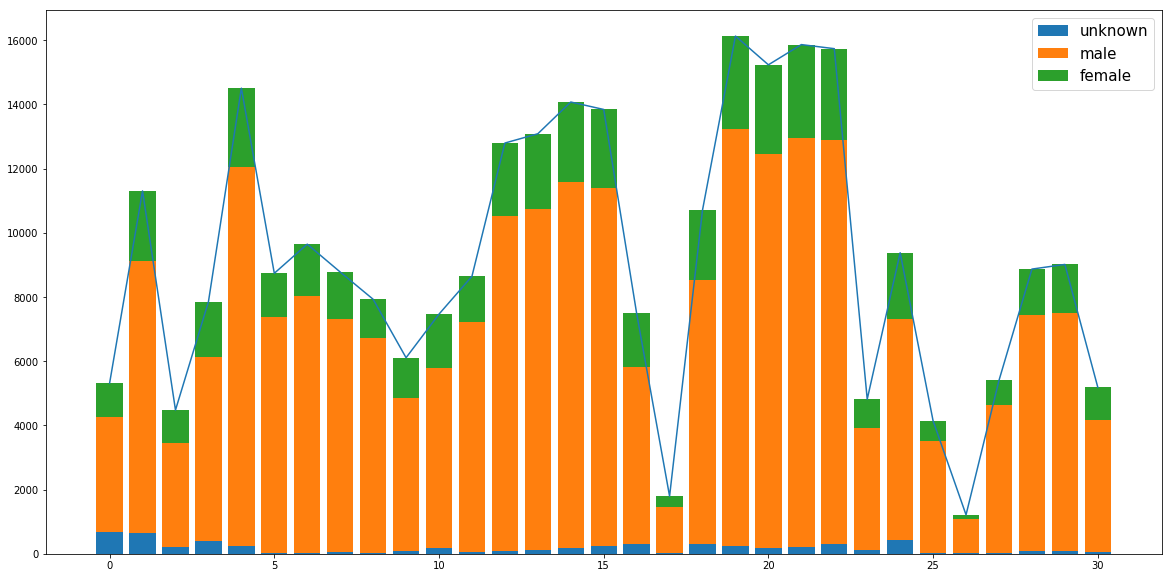

In [64]:
label_list = ['unknown', 'male', 'female']
f = plt.figure(figsize=(20, 10))
for i in range(citibike_np.shape[0]):
    plt.bar(np.arange(citibike_np.shape[1]), citibike_np[i], width=0.8, bottom=np.sum(citibike_np[:i], axis = 0))
    plt.legend(label_list, fontsize=15)
plt.plot(range(31), citibike.groupby('day').count()['bikeid'])

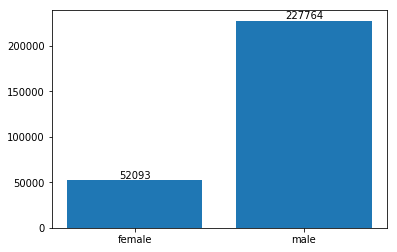

In [75]:
x = ['male', 'female']
y = citibike.groupby('gender').count()['bikeid'][1:]

plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b + 0.5, '%.0f'%b, ha='center', va='bottom', fontsize=10)

In [76]:
citibike.groupby('usertype').count()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,month,day
usertype,,,,,,,,,,,,,,,,
Customer,5628,5628,5628,5628,5628,5628,5628,5628,5628,5628,5628,5628,0,5628,5628,5628
Subscriber,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924,279924


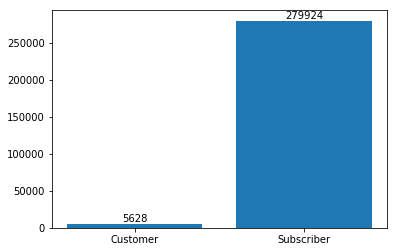

In [77]:
x = ['Customer', 'Subscriber']
y = citibike.groupby('usertype').count()['bikeid']

plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b + 0.5, '%.0f'%b, ha='center', va='bottom', fontsize=10)

### 3. Visualize the citibike usage by gender for a month averaged over a period of 24 hours.

In [78]:
citibike['hour'] = citibike.starttime.dt.hour
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,day,hour
0,1346,2015-01-01 00:01:00,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,1,1,0
1,363,2015-01-01 00:02:00,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,1,1,0
2,346,2015-01-01 00:04:00,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,1,1,0
3,182,2015-01-01 00:04:00,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,1,1,0
4,969,2015-01-01 00:05:00,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,1,1,0


In [84]:
max_i = citibike.hour.max()
citibike_np = np.ones((3, max_i + 1))

for i in range(max_i + 1):
    citibike_np[:, i] = np.array(citibike.loc[citibike.hour == i].groupby('gender').count()['bikeid'])
citibike_np

array([[  5.70000000e+01,   4.90000000e+01,   2.40000000e+01,
          1.80000000e+01,   1.10000000e+01,   1.80000000e+01,
          2.30000000e+01,   8.60000000e+01,   1.57000000e+02,
          1.84000000e+02,   3.20000000e+02,   4.82000000e+02,
          5.83000000e+02,   5.91000000e+02,   6.27000000e+02,
          6.53000000e+02,   5.87000000e+02,   3.60000000e+02,
          2.79000000e+02,   2.06000000e+02,   1.45000000e+02,
          1.16000000e+02,   6.00000000e+01,   5.90000000e+01],
       [  2.05400000e+03,   1.21100000e+03,   8.39000000e+02,
          5.31000000e+02,   5.31000000e+02,   1.90300000e+03,
          6.95100000e+03,   1.22710000e+04,   2.00060000e+04,
          1.53620000e+04,   9.49100000e+03,   9.39500000e+03,
          1.11300000e+04,   1.16400000e+04,   1.23490000e+04,
          1.29760000e+04,   1.63620000e+04,   2.29830000e+04,
          2.16640000e+04,   1.42940000e+04,   9.12300000e+03,
          6.23000000e+03,   5.10500000e+03,   3.36300000e+03],
      

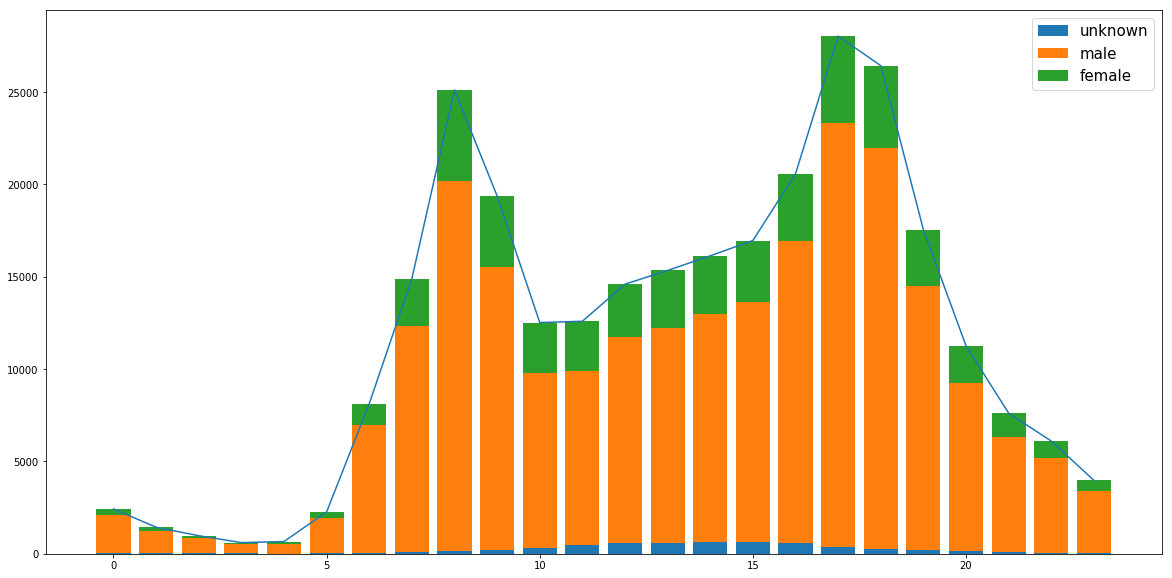

In [85]:
label_list = ['unknown', 'male', 'female']
f = plt.figure(figsize=(20, 10))
for i in range(citibike_np.shape[0]):
    plt.bar(np.arange(citibike_np.shape[1]), citibike_np[i], width=0.8, bottom=np.sum(citibike_np[:i], axis = 0))
    plt.legend(label_list, fontsize=15)
plt.plot(citibike.groupby('hour').count()['bikeid'])

(-1.1081841236426737,
 1.1040617003609108,
 -1.1063507961857058,
 1.1003024393815939)

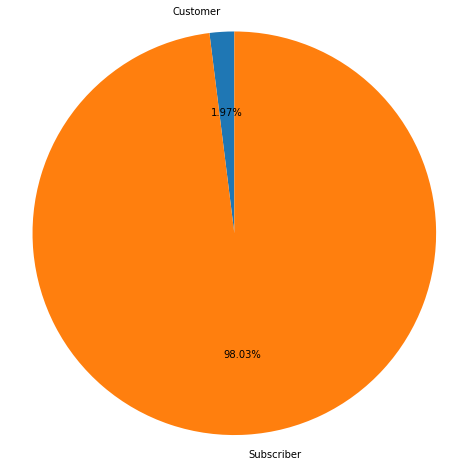

In [94]:
f = plt.figure(figsize=(8, 8))

explode = (0,0) #将某一块分割出来，值越大分割出的间隙越大
patches, text1, text2 = plt.pie(citibike.groupby('usertype').count()['bikeid'], 
                                explode=explode,
                                labels=['Customer', 'Subscriber'],
                                autopct='%3.2f%%', #数值保留固定小数位
                                shadow=False, #无阴影设置
                                startangle=90, #逆时针起始角度设置
                                pctdistance=0.6) #数值距圆心半径倍数距离
# patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')